In [1]:
# dataset: https://www.kaggle.com/shivamb/netflix-shows

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')

# Histograma

In [4]:
data = df['release_year']

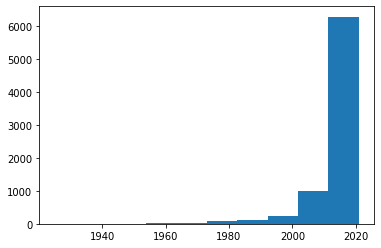

In [5]:
plt.hist(data)
plt.show()

## Cambiar el tamaño del contenedor de histograma en Matplotlib

Digamos, visualicemos un diagrama de histograma (distribución) en lotes de 1 año, ya que este es un marco de tiempo mucho más realista para los lanzamientos de películas y programas.

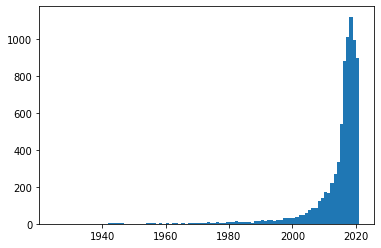

In [6]:
plt.hist(data, bins = np.arange(min(data), max(data) + 1, 1))
plt.show()

Si queremos tener 20 contenedores, usaríamos:

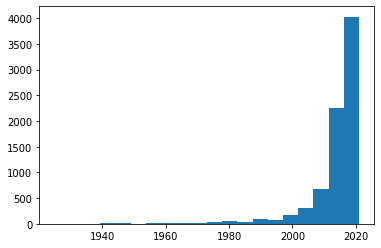

In [7]:
plt.hist(data, bins = 20)
plt.show()

Esto da como resultado 20 contenedores iguales, con datos dentro de esos contenedores agrupados y visualizados en sus respectivas barras:

## Trazar histograma con densidad

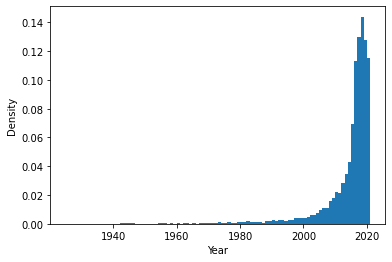

In [8]:
bins = np.arange(min(data), max(data) + 1, 1)

plt.hist(data, bins = bins, density = True)
plt.ylabel('Density')
plt.xlabel('Year')

plt.show()

## Personalización de gráficos de histograma en Matplotlib

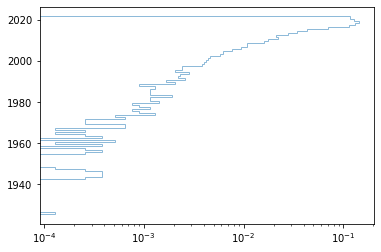

In [9]:
bins = np.arange(min(data), max(data) + 1, 1)

plt.hist(data, bins=bins, density=True, histtype='step', alpha=0.5, align='right', orientation='horizontal', log=True)

plt.show()

bins - Número de contenedores en la parcela

density - Si PyPlot usa recuento o densidad para poblar la trama

histtype- El tipo de gráfico de histograma (el valor predeterminado es bar, aunque otros valores como stepo stepfilledestán disponibles)

alpha - El alfa / transparencia de las líneas

align - A qué lado de los contenedores están alineadas las barras, el valor predeterminado es mid

orientation - Orientación horizontal / vertical, el valor predeterminado es vertical

log - Si el gráfico debe colocarse en una escala logarítmica o no

# Aumentemos la dificultad usando otras librerias

In [10]:
# importando modulos necesarios
import numpy as np
import pandas as pd
from pydataset import data
import re

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 
from bokeh.io import output_notebook, show
import folium

# graficos incrustados
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [11]:
# Cargamos algunos datasets de ejemplo
iris = data('iris')
tips = data('tips')

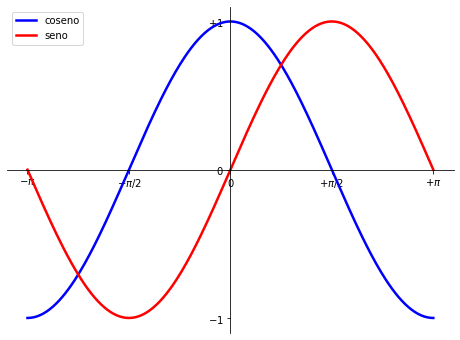

In [12]:
# Ejemplo matplotlib
# graficanco funciones seno y coseno
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# configurando el tamaño de la figura
plt.figure(figsize=(8, 6))
# dibujando las curvas
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="coseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")
# personalizando los valores de los ejes
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])
# agregando la leyenda
plt.legend(loc='upper left')
# moviendo los ejes de coordenadas
ax = plt.gca()  # get current axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
# mostrando el resultado
plt.show()

En este primer ejemplo vemos como podemos acceder a la API de Matplotlib desde el objeto pyplot e ir dando forma al gráfico. 

In [13]:
# Ejemplo con iris
# histograma de Petal.Length
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [14]:
# separo en especies
setosa = iris[iris.Species == 'setosa']
versicolor = iris[iris.Species == 'versicolor']
virginica = iris[iris.Species == 'virginica']

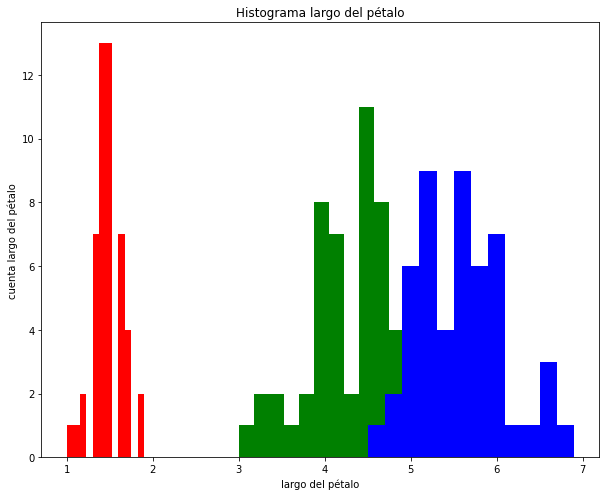

In [15]:

# crear histograma
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(setosa['Petal.Length'], 12, 
                            facecolor='red', label='setosa')
n, bins, patches = plt.hist(versicolor['Petal.Length'], 12, 
                            facecolor='green', label='versicolor')
n, bins, patches = plt.hist(virginica['Petal.Length'], 12, 
                            facecolor='blue', label='virginica')
#plt.legend(loc='top_right')
plt.title('Histograma largo del pétalo')
plt.xlabel('largo del pétalo')
plt.ylabel('cuenta largo del pétalo')
plt.show()

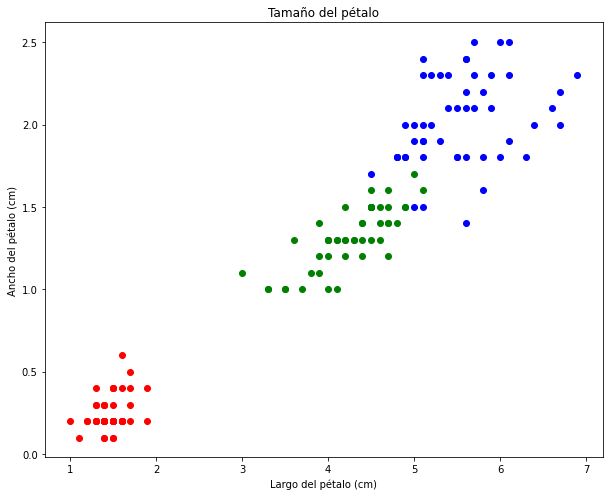

In [16]:
# Ejemplo diagrama de dispersion entre Petal.Length y Petal.Width
plt.figure(figsize=(10, 8))
plt.scatter(setosa['Petal.Length'], setosa['Petal.Width'], 
            c='red', label='setosa')
plt.scatter(versicolor['Petal.Length'], versicolor['Petal.Width'], 
            c='green', label='versicolor')
plt.scatter(virginica['Petal.Length'], virginica['Petal.Width'], 
            c='blue', label='virginica')
plt.title('Tamaño del pétalo')
plt.xlabel('Largo del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
#plt.legend(loc='top_left')
plt.show()

Bokeh

In [17]:
# Ejemplo de histograma de Petal.Length
# solo 2 lineas de código
hist = Histogram(iris, values="Petal.Length", color="Species",
                 legend="top_right", bins=12)
show(hist)

NameError: name 'Histogram' is not defined

Seaborn

/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


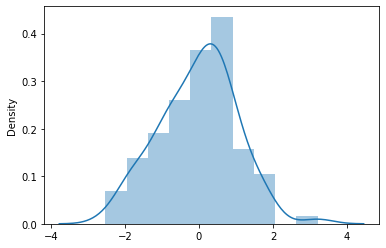

In [18]:
# Ejemplo gráfico de distribuciones
x = np.random.normal(size=100)
dist= sns.distplot(x)

In [19]:

# Ejemplo gráfico regresión con tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


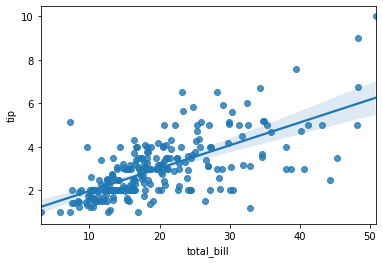

In [20]:
reg = sns.regplot(x="total_bill", y="tip", data=tips)


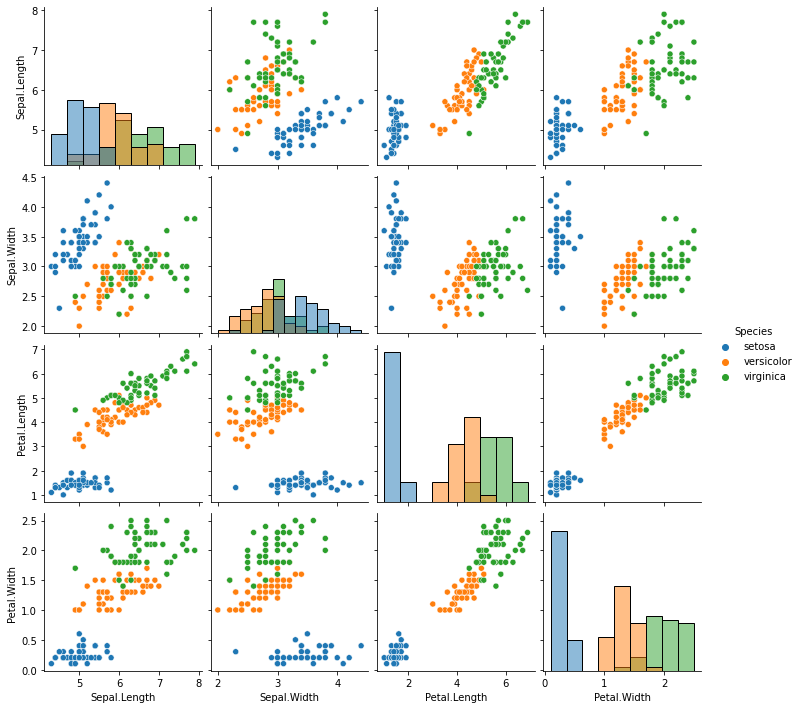

In [21]:
# Ejemplo pairplot con datase iris
g = sns.pairplot(iris, hue="Species", diag_kind="hist")  

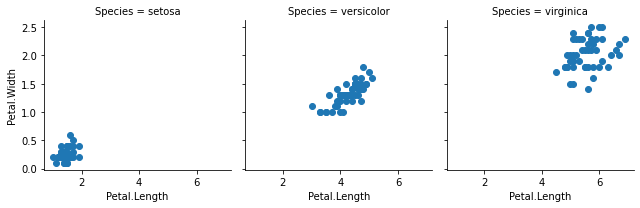

In [22]:
# Ejemplo FacetGrid con iris
g = sns.FacetGrid(iris, col="Species")
g = g.map(plt.scatter, "Petal.Length", "Petal.Width")

# Countplot de Seaborn

La biblioteca Seaborn tiene una función countpot () para crear couplot, echemos un vistazo a su sintaxis y parámetros.

seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, kwargs)**

x, y, hue : names of variables in data or vector data, optional
  This is the input provided for building the plot.
  
data : DataFrame, array, or list of arrays, optional
  Here we pass the data for the purpose of plotting the graph.
  
order, hue_order : lists of strings, optional
  This is the order used for plotting categorical levels.
  
orient : “v” | “h”, optional
  Through this parameter, we can set the orientation of plot as horizontal or vertical.
  
color : matplotlib color, optional
  In this parameter, we are setting the color of the plot.
  
palette : palette name, list, or dict
  The palette will be deciding the colors for the graph.
  
ax : matplotlib Axes, optional
  These are the axes over which the plot is built.

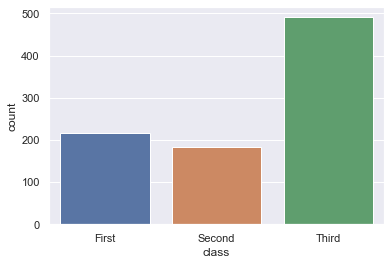

In [29]:
import seaborn as sns

sns.set_theme(style="darkgrid")

titanic = sns.load_dataset("titanic")

ax = sns.countplot(x="class", data=titanic)

Seaborn Countplot with Two Variables using Hue

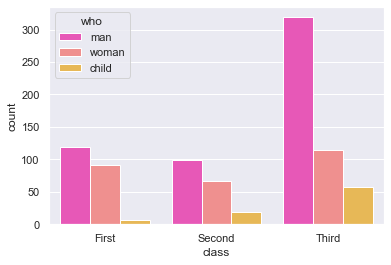

In [30]:
ax = sns.countplot(x="class", hue="who", data=titanic, palette="spring")


Horizontal Countplot in Seaborn

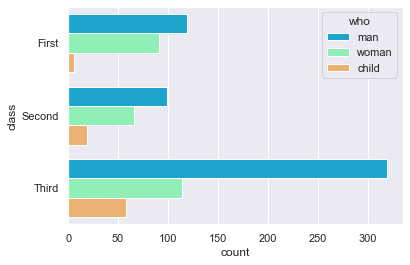

In [31]:
ax = sns.countplot(y="class", hue="who", data=titanic, palette="rainbow")


Applying styling to the Countplot bar

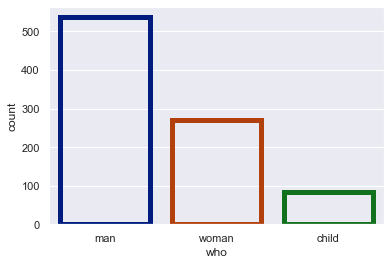

In [32]:
ax = sns.countplot(x="who", data=titanic,

                   facecolor=(0, 0, 0, 0),

                   linewidth=5,

                   edgecolor=sns.color_palette("dark", 3))

Distplot con KDE e histograma

/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


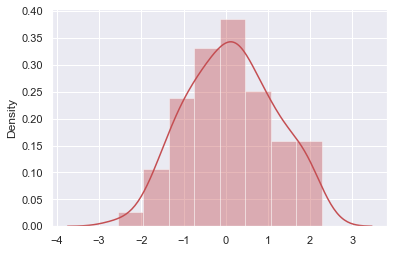

In [33]:
import seaborn as sns, numpy as np

sns.set_theme(); 

np.random.seed(0)

x = np.random.randn(125)

ax = sns.distplot(x, color="r")

Distplot with Rug Plot Parameter

/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


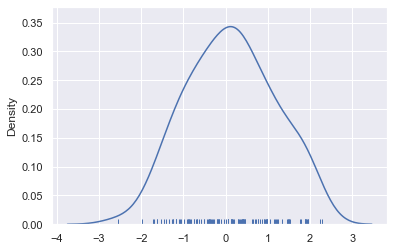

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

ax = sns.distplot(x, rug=True, hist=False)

Horizontal Distplot in Seaborn

/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


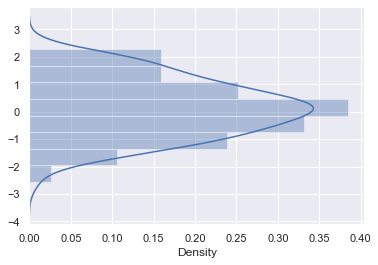

In [35]:
ax = sns.distplot(x, vertical=True)


Distplot with Rug, KDE and Histogram plot

/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/wisrovi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


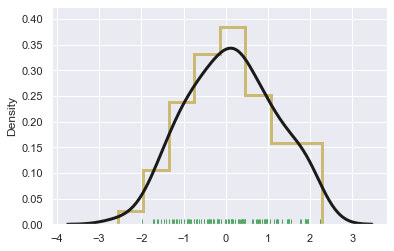

In [37]:
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},

                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},

                  hist_kws={"histtype": "step", "linewidth": 3,

                            "alpha": 1, "color": "y"})

categorización en capas de contenedores de histograma usando Hue en Seaborn

In [39]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='mpg', ylabel='Count'>

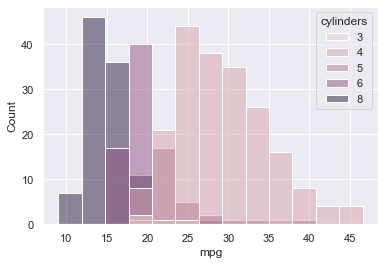

In [40]:
sns.histplot(data=mpg, x="mpg", hue="cylinders")


Categorización de contenedores de histograma usando Hue y Stack

<AxesSubplot:xlabel='mpg', ylabel='Count'>

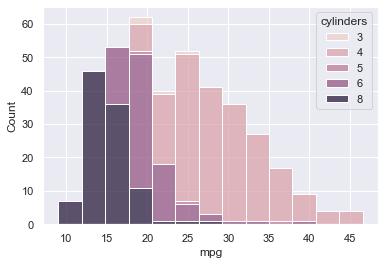

In [41]:
sns.histplot(data=mpg, x="mpg", hue="cylinders", multiple="stack")


Categorización de contenedores de histograma usando Hue y Step

<AxesSubplot:xlabel='mpg', ylabel='Count'>

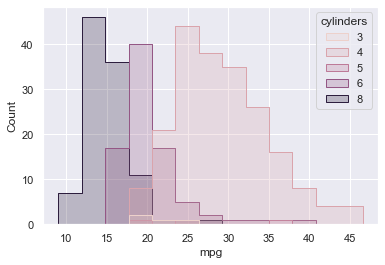

In [42]:
sns.histplot(mpg, x="mpg", hue="cylinders", element="step")


Histograma con forma de polígono en Seaborn

<AxesSubplot:xlabel='mpg', ylabel='Count'>

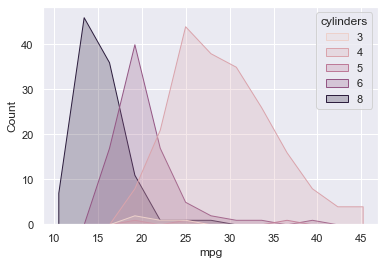

In [43]:
sns.histplot(mpg, x="mpg", hue="cylinders", element="poly")


Histograma de Seaborn para comparación

<AxesSubplot:xlabel='day', ylabel='Count'>

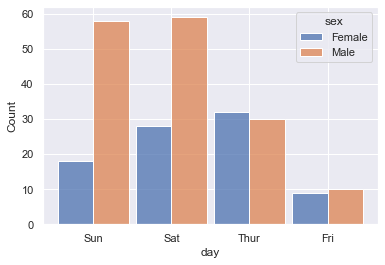

In [44]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.9)


Bivariate Histogram


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

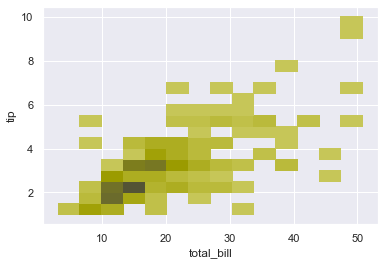

In [45]:
sns.histplot(tips, x="total_bill", y="tip", color = "yellow")


Bivariate Histogram with Colorbar

In [46]:
planets = sns.load_dataset("planets")


<AxesSubplot:xlabel='year', ylabel='distance'>

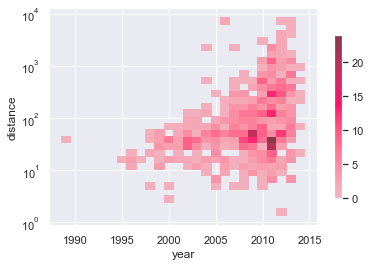

In [47]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),color="pink"
)

Folium

In [23]:
# dataset de bicicleterías de Ciudad de Buenos Aires (Buscado en: https://data.buenosaires.gob.ar/)
# descargado desde https://data.buenosaires.gob.ar/dataset/bicicleterias
bici = pd.read_csv('data/bicicleterias.csv', sep=',')
bici.head()

,WKT,id,nombre,direccion,telefono,email,web,mecanica_s,horario_de,calle,altura,calle2,direccion_,barrio,comuna
0,POINT (-58.4256879365174 -34.5923050897605),1,Bicicletas Araoz,Araoz 1458,011-4833-7887 / 011-4832-7704,info@biciccletasaraoz.com.ar,http://www.bicicletasaraoz.com.ar/,True,Lun a Vier de 9.30 a 19,ARAOZ,1458,NaN,ARAOZ 1458,Palermo,Comuna 14
1,POINT (-58.4259820523858 -34.5813777353459),2,Roda2oro,Oro 2305,4774-0403,Roda2oro@gmail.com,http://www.roda2oro.com/,False,Lun a vier de 10 a 13 y de 14.30 a 19 / S,FRAY JUSTO SANTAMARIA DE ORO,2305,NaN,FRAY JUSTO SANTAMARIA DE ORO 2305,Palermo,Comuna 14
2,POINT (-58.4153429603451 -34.6533516212895),3,Walter,Linch 3914,4912-2738,walterbikes-10@hotmail.com,NaN,False,NaN,LYNCH,3914,NaN,LYNCH 3914,Nueva Pompeya,Comuna 4
3,POINT (-58.4432441275002 -34.5943508729756),4,Bici Shop,Villaroel 1093,4855-8329,info@tubicicleteria.com,www.tubicicleteria.com,False,NaN,VILLARROEL,1093,NaN,VILLARROEL 1093,Villa Crespo,Comuna 15
4,POINT (-58.3773343753292 -34.6083635891506),5,Bicicleterias El colo,Rivadavia 770,4342--3887,info@bicicleteriaelcolo.com.ar,http://www.bicicleteriaelcolo.com.ar/,True,Lun a vier de 9 a 19/Sab de 9 a 13,RIVADAVIA AV.,770,NaN,RIVADAVIA AV. 770,Monserrat,Comuna 1


In [24]:
# corregimos el campo de coordenadas del dataset.
def coord(c):
    coor = re.findall(r'-?\d+\.\d{7}', c)
    coords = [float(s) for s in coor]
    return coords[::-1]

bici['WKT'] = bici['WKT'].apply(coord)

# filtramos solo las bicicleterías de palermo
bici_palermo = bici[bici.barrio == 'Palermo'][['WKT', 'nombre']]

In [25]:
# creamos el mapa con folium
mapa = folium.Map(location=[-34.588889, -58.430556], zoom_start=13)

In [26]:
# agregamos los markers con el nombre de cada bicicletería.
for index, row in bici_palermo.iterrows():
    location = row['WKT']
    folium.Marker(location, 
                  popup=row['nombre'],
                  marker_color='red',
                  marker_icon='info-sign').add_to(mapa)

In [27]:
mapa

## Grafico radar

## Cómo hacer impresionantes gráficos de radar con Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo

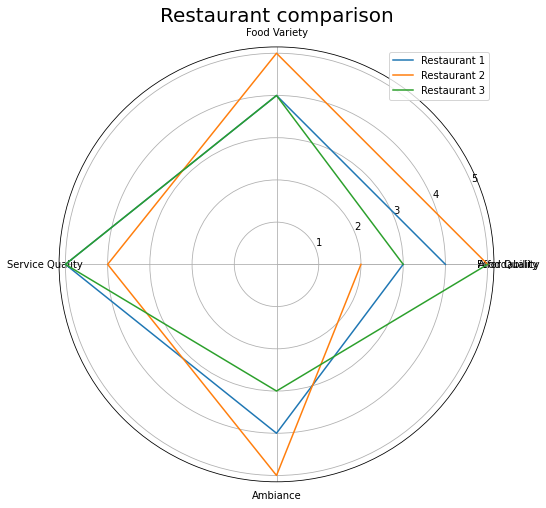

In [2]:
categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1')
plt.plot(label_loc, restaurant_2, label='Restaurant 2')
plt.plot(label_loc, restaurant_3, label='Restaurant 3')
plt.title('Restaurant comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

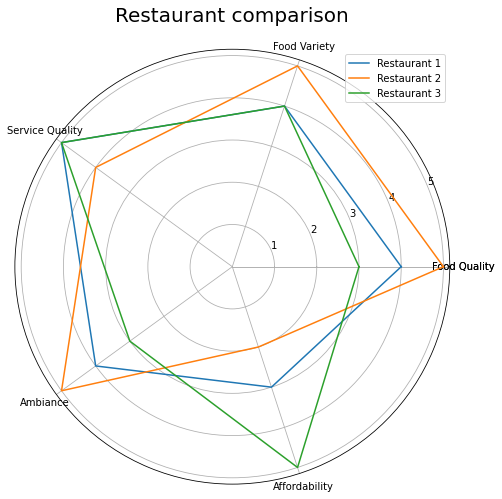

In [3]:
categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1')
plt.plot(label_loc, restaurant_2, label='Restaurant 2')
plt.plot(label_loc, restaurant_3, label='Restaurant 3')
plt.title('Restaurant comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

Crear un grafico en html

In [4]:
categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambience', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, name='Restaurant 1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, name='Restaurant 2'),
        go.Scatterpolar(r=restaurant_3, theta=categories, name='Restaurant 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

Creando poligonos (html):

In [5]:

categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='Restaurant 1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, fill='toself', name='Restaurant 2'),
        go.Scatterpolar(r=restaurant_3, theta=categories, fill='toself', name='Restaurant 3')
    ],
    layout=go.Layout(
        template='plotly_dark',
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

# Reportes

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import calendar
from datetime import datetime
from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

Generación de datos

generate_sales_data() funciones devuelve un Pandas DataFrame con datos ficticios para un mes determinado

El mes se pasa como entero

In [ ]:
def generate_sales_data(month: int) -> pd.DataFrame:
    # Date range from first day of month until last
    # Use ```calendar.monthrange(year, month)``` to get the last date
    dates = pd.date_range(
        start=datetime(year=2020, month=month, day=1),
        end=datetime(year=2020, month=month, day=calendar.monthrange(2020, month)[1])
    )
    
    # Sales numbers as a random integer between 1000 and 2000
    sales = np.random.randint(low=1000, high=2000, size=len(dates))
    
    # Combine into a single dataframe
    return pd.DataFrame({
        'Date': dates,
        'ItemsSold': sales
    })

In [ ]:
generate_sales_data(month=3)

Visualización de datos de ventas

plot() La función visualiza un solo mes de ventas (serie temporal).

En lugar de mostrar la figura, la función la guarda en un archivo.

El nombre de archivo se especifica mediante un parámetro

In [ ]:
def plot(data: pd.DataFrame, filename: str) -> None:
    plt.figure(figsize=(12, 4))
    plt.grid(color='#F2F2F2', alpha=1, zorder=0)
    plt.plot(data['Date'], data['ItemsSold'], color='#087E8B', lw=3, zorder=5)
    plt.title(f'Sales 2020/{data["Date"].dt.month[0]}', fontsize=17)
    plt.xlabel('Period', fontsize=13)
    plt.xticks(fontsize=9)
    plt.ylabel('Number of items sold', fontsize=13)
    plt.yticks(fontsize=9)
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()
    return

In [ ]:
december = generate_sales_data(month=12)
plot(data=december, filename='december.png')

Construir elementos de la pagina

construct() La función crea un directorio para las parcelas y luego crea un gráfico de ventas para cada mes en 2020 excepto enero

    Se excluyó enero porque queremos mostrar cómo puede tener un número diferente de elementos en la página de informes.

    No dudes en incluirlo
        Cambiar for i in range(2, 13)afor i in range(1, 13)

Una vez que se guardan las visualizaciones, se agregan a una lista de estructura de lista (matriz)

    Máximo de 3 elementos por fila

    Puede ser menor
    
    Una sola fila en esta matriz representa una sola página

        Si la fila tiene 3 elementos, la página del informe tendrá 3 visualizaciones

In [ ]:
PLOT_DIR = 'plots'

def construct():
    # Delete folder if exists and create it again
    try:
        shutil.rmtree(PLOT_DIR)
        os.mkdir(PLOT_DIR)
    except FileNotFoundError:
        os.mkdir(PLOT_DIR)
        
    # Iterate over all months in 2020 except January
    for i in range(2, 13):
        # Save visualization
        plot(data=generate_sales_data(month=i), filename=f'{PLOT_DIR}/{i}.png')
        
    # Construct data shown in document
    counter = 0
    pages_data = []
    temp = []
    # Get all plots
    files = os.listdir(PLOT_DIR)
    # Sort them by month - a bit tricky because the file names are strings
    files = sorted(os.listdir(PLOT_DIR), key=lambda x: int(x.split('.')[0]))
    # Iterate over all created visualization
    for fname in files:
        # We want 3 per page
        if counter == 3:
            pages_data.append(temp)
            temp = []
            counter = 0

        temp.append(f'{PLOT_DIR}/{fname}')
        counter += 1

    return [*pages_data, temp]

In [ ]:
plots_per_page = construct()

4 páginas en total

Los primeros 3 tienen 3 parcelas por página

El último tiene solo 2

In [ ]:
plots_per_page

PDF class

Hereda de PDF

    Todos los métodos y propiedades se heredan

    No olvides llamar super()al constructor

La clase se usa para generar un informe a partir de la plots_per_pagematriz.

In [ ]:
class PDF(FPDF):
    def __init__(self):
        super().__init__()
        self.WIDTH = 210
        self.HEIGHT = 297
        
    def header(self):
        # Custom logo and positioning
        # Create an `assets` folder and put any wide and short image inside
        # Name the image `logo.png`
        self.image('assets/logo.png', 10, 8, 33)
        self.set_font('Arial', 'B', 11)
        self.cell(self.WIDTH - 80)
        self.cell(60, 1, 'Sales report', 0, 0, 'R')
        self.ln(20)
        
    def footer(self):
        # Page numbers in the footer
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.set_text_color(128)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

    def page_body(self, images):
        # Determine how many plots there are per page and set positions
        # and margins accordingly
        if len(images) == 3:
            self.image(images[0], 15, 25, self.WIDTH - 30)
            self.image(images[1], 15, self.WIDTH / 2 + 5, self.WIDTH - 30)
            self.image(images[2], 15, self.WIDTH / 2 + 90, self.WIDTH - 30)
        elif len(images) == 2:
            self.image(images[0], 15, 25, self.WIDTH - 30)
            self.image(images[1], 15, self.WIDTH / 2 + 5, self.WIDTH - 30)
        else:
            self.image(images[0], 15, 25, self.WIDTH - 30)
            
    def print_page(self, images):
        # Generates the report
        self.add_page()
        self.page_body(images)

Cree una instancia y cree un informe:

In [ ]:
pdf = PDF()

for elem in plots_per_page:
    pdf.print_page(elem)
    
pdf.output('SalesRepot.pdf', 'F')

# Crear documentos PDF en Python con ReportLab

ReportLab es un toolkit de código abierto para crear documentos PDF desde Python. Se trata de una librería muy extensa y con muchas funcionalidades, desde pequeños textos y figuras geométricas a grandes gráficos e ilustraciones, todo ello puede ser incluido dentro de un PDF. En este artículo estaremos sopesando sus características generales y sus principales funciones para crear este tipo de documentos.

In [48]:
from reportlab.pdfgen import canvas
c = canvas.Canvas("hola-mundo.pdf")
c.save()

In [49]:
c.drawString(50, 50, "¡Hola, mundo!")


In [50]:
from reportlab.lib.pagesizes import A4, letter

In [51]:
from reportlab.lib.pagesizes import letter
c = canvas.Canvas("hola-mundo.pdf", pagesize=letter)

In [52]:
from reportlab.lib.pagesizes import A4
c = canvas.Canvas("hola-mundo.pdf", pagesize=A4)

In [53]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
w, h = A4
c = canvas.Canvas("hola-mundo.pdf", pagesize=A4)
c.drawString(50, h - 50, "¡Hola, mundo!")
c.showPage()
c.save()

Líneas y figuras geométricas


In [54]:
# Dibujar una línea horizontal.
x = 50
y = h - 50
c.line(x, y, x + 200, y)

In [55]:
# Rectángulo.
c.rect(50, h - 300, 300, 200)

In [56]:
# Rectángulo con extremos curvos.
c.roundRect(50, h - 300, 300, 200, 10)

In [57]:
# Círculo: posición (x, y) del centro y el radio.
c.circle(100, h - 100, 50)

In [58]:
c.ellipse(50, h - 50, x + 150, y - 50)

In [59]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
w, h = A4
c = canvas.Canvas("figuras.pdf", pagesize=A4)
c.drawString(30, h - 50, "Línea")
x = 120
y = h - 45
c.line(x, y, x + 100, y)
c.drawString(30, h - 100, "Rectángulo")
c.rect(x, h - 120, 100, 50)
c.drawString(30, h - 170, "Círculo")
c.circle(170, h - 165, 20)
c.drawString(30, h - 240, "Elipse")
c.ellipse(x, y - 170, x + 100, y - 220)
c.showPage()
c.save()

Estilos

In [60]:
# Valores RGB entre 0.0 y 1.0.
c.setFillColorRGB(1, 0, 0)
c.drawString(50, h - 50, "¡Hola, mundo!")
c.rect(50, h - 150, 50, 50, fill=True)

In [61]:
c.setStrokeColorRGB(0.7, 0, 0.7)

In [62]:
c.setFont("Helvetica", 10)
c.drawString(50, h - 50, "¡Hola, mundo!")
c.setFont("Times-Roman", 20)
c.drawString(130, h - 50, "¡Hola, mundo!")

Textos

In [63]:
text = c.beginText(50, h - 50)


In [64]:
text.setFont("Times-Roman", 12)


In [65]:
# Las dos frases aparecen en dos líneas diferentes.
text.textLine("¡Hola, mundo!")
text.textLine("¡Desde ReportLab y Python!")

In [66]:
# El método textLines() soporta el carácter de salto de línea.
text.textLines("¡Hola, mundo!\n¡Desde ReportLab y Python!")

In [67]:
c.drawText(text)


Imágenes

In [70]:
c.drawImage("assets/logo.png", 50, h - 200)


(526, 469)

In [72]:
c.drawImage("assets/logo.png", 50, h - 200, width=50, height=50)


(526, 469)

Grillas


In [68]:
xlist = [10, 60, 110, 160]
ylist = [h - 10, h - 60, h - 110, h - 160]
c.grid(xlist, ylist)

In [73]:
import itertools
from random import randint
from statistics import mean
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
def grouper(iterable, n):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args)
def export_to_pdf(data):
    c = canvas.Canvas("grilla-alumnos.pdf", pagesize=A4)
    w, h = A4
    max_rows_per_page = 45
    # Margin.
    x_offset = 50
    y_offset = 50
    # Space between rows.
    padding = 15
    
    xlist = [x + x_offset for x in [0, 200, 250, 300, 350, 400, 480]]
    ylist = [h - y_offset - i*padding for i in range(max_rows_per_page + 1)]
    
    for rows in grouper(data, max_rows_per_page):
        rows = tuple(filter(bool, rows))
        c.grid(xlist, ylist[:len(rows) + 1])
        for y, row in zip(ylist[:-1], rows):
            for x, cell in zip(xlist, row):
                c.drawString(x + 2, y - padding + 3, str(cell))
        c.showPage()
    
    c.save()
data = [("NOMBRE", "NOTA 1", "NOTA 2", "NOTA 3", "PROM.", "ESTADO")]
for i in range(1, 101):
    exams = [randint(0, 10) for _ in range(3)]
    avg = round(mean(exams), 2)
    state = "Aprobado" if avg >= 4 else "Desaprobado"
    data.append((f"Alumno {i}", *exams, avg, state))
export_to_pdf(data)

# Bibliografia

## Visualizaciones

https://stackabuse.com/matplotlib-histogram-plot-tutorial-and-examples/

https://relopezbriega.github.io/blog/2016/09/18/visualizaciones-de-datos-con-python/

https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca#_=_

https://www.pluralsight.com/guides/map-visualizations-in-python-using-folium

https://machinelearningknowledge.ai/seaborn-countplot-tutorial-for-beginners/

https://machinelearningknowledge.ai/11-python-data-visualization-libraries-data-scientists-should-know/

https://machinelearningknowledge.ai/seaborn-distplot-explained-for-beginners/

https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/

Libro: https://gumroad.com/l/data-visualization-in-python

## Reportes

https://recursospython.com/guias-y-manuales/crear-documentos-pdf-en-python-con-reportlab/